# Meditation using Wavelet Transform

In [2]:
import pandas as pd
import scipy
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pywt
from sklearn.feature_selection import VarianceThreshold
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from pywt import wavedecn, waverecn

In [752]:
# y = []
# lst = []
# X = []
# direc = '/Users/yanran/Documents/Brainco_eyeblink/yanran data/NewOldMeditationData'
# for root, dirs, files in os.walk(direc):
#     lst.append(files)
# for i in files:
#     if 'Meditation_flatten' in i:
#         X.append(np.loadtxt(os.path.join(direc,i)))
#         y.append(1)
#     elif 'CloseEyeRelax3_flatten' in i:
#         X.append(np.loadtxt(os.path.join(direc,i)))
#         y.append(0)

In [753]:
# meditation_lst = []
# for i in range(0,len(X)):
#     meditation_lst.append(X[i][0:20000])

In [754]:
##################################   data  reading #####################################

# y = []
# X1 = []
# X2 = []
# lst2 = []
# meditation_lst = []
# direc = '/Users/yanran/exp_platform/Meditation_data'
# for root, dirs, files in os.walk(direc):  
#     lst2.append(root)            
# for path in lst2[1:]:
#     f_ls = os.listdir(path)
#     for f in f_ls:
#         if ('Meditation3_flatten') in f:
#             X1.append(np.loadtxt(os.path.join(path,f)))
# #             y.append(1)
# #         elif ('Meditation6_flatten') in f:
# #             X1.append(np.loadtxt(os.path.join(path,f)))
# # #             y.append(1)
#         elif ('Relax3_flatten') in f:
#             X2.append(np.loadtxt(os.path.join(path,f)))
# #             y.append(0)

In [3]:
X1 = []
X2 = []
lst = []
X = []
y = []
meditation_lst =[]
direc = '/Users/yanran/Documents/Brainco_eyeblink/yanran data/NewOldMeditationData'
for root, dirs, files in os.walk(direc):
    lst.append(files)
for i in files:
    if 'Meditation_flatten' in i:
        X1.append(np.loadtxt(os.path.join(direc,i)))
    elif 'CloseEyeRelax3_flatten' in i:
        X2.append(np.loadtxt(os.path.join(direc,i)))
for j in range(0,len(X1)):
    for k in range(0,20000,800):
        meditation_lst.append(X1[j][k:k+800])
        y.append(1)
for m in range(0,len(X2)):
    for n in range(0,20000,800):
        meditation_lst.append(X2[m][n:n+800])
        y.append(0)

In [5]:
X = np.array(meditation_lst)
y = np.array(y)
print (X.shape, y.shape, len(X))

(575, 800) (575,) 575


In [863]:
# # pywt.downcoef('a', X, 'db2', mode='symmetric', level=2)
# w = pywt.Wavelet('sym5')
# pywt.dwt_coeff_len(len(X), filter_len=w.dec_len, mode='symmetric')

In [864]:
# coeffs[-2] == np.zeros_like(coeffs[-2])
# coeffs = pywt.wavedec(X[1], 'db2', level=2)
# ca,cb,ce = coeffs
# #max_level of useful decomposition 
# w = pywt.Wavelet('sym5')
# print pywt.dwt_max_level(len(X[0]), filter_len=w.dec_len)
# print len(ca),len(cb),len(ce)

In [8]:
wave_lst = []
# w = pywt.Wavelet('sym5')
for j in range(0,len(X)):
    temp  = []
    for i in pywt.wavedec(X[j],'db2',level = 2):
        temp.append(i)
    wave_lst.append(temp)
# kmeans = KMeans(n_clusters=5, random_state=0).fit(np.array(wave_lst[0]))
#         me = kmeans.transform(i)       
# for i in pywt.wavedec(X[0],'db2',level = 2):
#     wave_lst.append(i)
# kmeans = KMeans(n_clusters=5, random_state=0).fit(wave_lst)
# wave_lst = []
# for i in range(0,len(X)):
#     temp =[]
#     for j in pywt.wavedec(meditation_lst[i],'db2',level = 2):
#         wave_lst.append(j)
# wave_lst[0]
# X = np.array(wave_lst)
# X[0].shape
# kmeans = KMeans(n_clusters=5, random_state=0).fit()
# coeffs = wavedecn(np.ones((4, 4, 4)), 'db1')
wave_lst[0]

[array([  12.41267669,    9.24340046,   56.54476751,   94.13430964,
          88.97231153,  137.66544058,  172.12752737,   -6.43672959,
        -230.23349002, -200.94334134, -176.51040822, -119.31553137,
         -83.13080729,  -54.35479436,  -51.03280319,  -57.50439696,
         -89.40661784,  -88.66391149, -112.66710758,  -57.39457004,
         -78.97691833,  -76.0560908 ,  -84.33346466,  -71.33840896,
         -39.42757782,  -26.47224492,  -27.69279116,   10.6886594 ,
          67.04610592,   66.1638794 ,  109.33928664,  149.84261059,
         219.68624668,  290.2655613 ,  296.57617228,  350.03259385,
         363.10632499,  351.48177458,  420.30580341,  448.77203629,
         385.67695259,  304.00142192,  310.42771288,  250.15423384,
         211.57489791,  198.56392702,  199.65779016,  182.02184249,
         194.48647701,  282.86718997,  281.10724388,  264.73775332,
         153.76768304,    1.30636563, -117.6861045 , -193.76672017,
        -217.8498755 , -201.8102008 , -234.37939

In [7]:
wave_lst = np.array(wave_lst[0]).reshape(3,1)
wave_lst.shape
# kmeans = KMeans(n_clusters=5, random_state=0).fit(wave_lst)
# me = kmeans.transform(wave_lst)

(3, 1)

In [882]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(dt)

In [883]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [878]:
len(wave_lst[0][2])

401

In [867]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(wave_lst)
me = kmeans.transform(wave_lst)
# X = np.array(new_cluster)
# fig = plt.figure(figsize = (16,7))
# plt.plot(X,'.')

TypeError: float() argument must be a string or a number

In [732]:
#################################### data processing  ###########################################
# meditation_lst = []
# y = []
# for j in range(0,len(X)):
#     for i in range(0,20000,2000):
#         meditation_lst.append(X1[j][i:i+2000])
#         y.append(1)
# for j in range(0,len(X2)):
#     for i in range(0,20000,2000):
#         meditation_lst.append(X2[j][i:i+2000])
#         y.append(0)

In [648]:
################################# wavelet transform  ###########################################

# all_lst = []
# for i in range(0,len(meditation_lst)):
#     temp = []
#     for j in pywt.wavedec(meditation_lst[i], 'db2', level = 2):
#         temp.append(j.mean())
#         temp.append(j.max())
#         temp.append(j.min())
#         temp.append(j.std())
#     all_lst.append(temp)
# X = np.array(all_lst)
# y = np.array(y)
#     for wave in pywt.wavelist(): 
#         try: 
#             for j in pywt.wavedec(meditation_lst[i], wave, level = 7):
#                 tmp_lst.append(j.mean())
#         except:
#             pass
#     mean_lst.append(tmp_lst)

# mean_array = np.array(mean_lst)
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# X = sel.fit_transform(mean_array)
#PCA
# pca = PCA(n_components=200)
# X = pca.fit_transform(mean_array)
# # pca.fit(mean_array.T)
# # X = pca.components_
# plt.plot(pca.explained_variance_ratio_) 
# X.shape
# X = scipy.signal.medfilt(X,21) #median filter
# from scipy.ndimage.filters import median_filter
# X = median_filter(X, 3)
# len(X[0])

In [657]:
# Logististic Regression
sc = StandardScaler()
store = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    me = LogisticRegression(C = 100,penalty='l2',solver='lbfgs')
    me.fit(X_train, y_train)
    y_pred = me.predict(X_test)
    store.append(me.score(X_test,y_test))
    print 'Ture value   : ' ,y_test
    print 'Predict value :',y_pred
    print 'Mean score :  ', np.mean(store)

ValueError: setting an array element with a sequence.

In [650]:
np.mean(store)

nan

In [417]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=9, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.484


In [418]:
#SVM
store = []
for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    clf = svm.SVC()
    clf.fit(X_train, y_train)  
    store.append(clf.score(X_test, y_test))

In [419]:
np.mean(store)

0.6913294797687861

[[ 2.90126698e+00  5.75755743e+02 -6.45020383e+02  1.07520834e+02
  -1.66728398e-01  2.15082905e+02 -1.98207374e+02  4.00276734e+01
  -3.40147540e-01  1.23556041e+02 -1.10617920e+02  3.03616199e+01
   4.16684806e-02  6.96841424e+01 -7.98255199e+01  1.83717325e+01
   3.58584900e-05  4.63609316e+01 -4.33781708e+01  6.84986113e+00
   1.15597846e-02  4.53602850e+01 -4.66385383e+01  8.11377867e+00]
 [ 3.47515282e+00  5.76623147e+03 -6.51758834e+03  1.27118436e+03
  -8.61497609e+00  2.72297445e+03 -3.46794456e+03  5.79628118e+02
   2.80228678e-01  1.47829486e+03 -1.33707783e+03  2.45846915e+02
  -3.55894965e-01  7.96177178e+02 -9.51144071e+02  1.07444887e+02
   4.18020306e-01  3.03838092e+02 -2.55291190e+02  4.09458272e+01
   9.39264005e-02  1.33606699e+02 -2.34034723e+02  1.76810261e+01]]


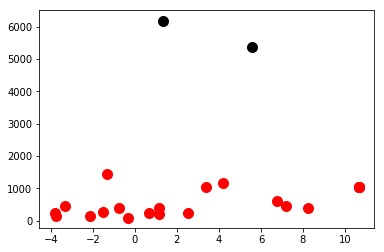

In [276]:
from sklearn.cluster import KMeans
# create kmeans object
kmeans = KMeans(n_clusters=2)
# fit kmeans object to data
kmeans.fit(X)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(X)
plt.scatter(X[y_km ==0,0], X[y_km == 0,1], s=100, c='red')
plt.scatter(X[y_km ==1,0], X[y_km == 1,1], s=100, c='black')
# plt.scatter(X[y_km ==2,0], X[y_km == 2,1], s=100, c='blue')
# plt.scatter(X[y_km ==3,0], X[y_km == 3,1], s=100, c='cyan')

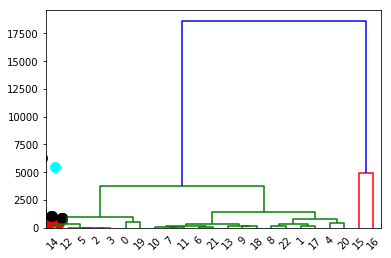

In [246]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X)
plt.scatter(X[y_hc ==0,0], X[y_hc == 0,1], s=100, c='red')
plt.scatter(X[y_hc==1,0], X[y_hc == 1,1], s=100, c='black')
plt.scatter(X[y_hc ==2,0], X[y_hc == 2,1], s=100, c='blue')
plt.scatter(X[y_hc ==3,0], X[y_hc == 3,1], s=100, c='cyan')

In [14]:
# lst_1= []
# for i in range(0,len(df)):
#     data= df['data'][i].split(',')
#     lst = data[1:79]
#     lst_1 += map(float,lst)
# arr = np.array(lst_1)

In [15]:
# x = np.linspace(0,len(arr[:180*160])/160.6,len(arr[:180*160]))
# y = arr[:180*160]
# fig = plt.figure(figsize = (16,7))
# plt.xlabel('Time(sec)')
# plt.ylabel('Voltage(Vm)')
# plt.title('Meditation')
# plt.plot(x,y,'y-')
# plt.grid()
# plt.show()

In [ ]:
# import pywt
# for i in range(0,11):
#     coeffs= pywt.wavedec(arr_1[320:3200], 'db5', level = 7) 